In [ ]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'customer-segmentation-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1835880%2F2996440%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240226%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240226T161103Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7c9c5675ee00a8ec2ce7f5da7798ce00d7880f99688f4c52b3f6210a3c0824186887e04f1fd9a937e84e42699fc7f88d0e834dd090071b85f883a35aa8fb0af46080abc0e6b3827a320943d33543f08470ef23f313261374ec0970b185c3047250c4f2944faac99b3442b8f7fdb73e083017f5dd0df6ec1c1c363cb240ac9d6a15904e6d5947f1ff0639cc1e9fd5e5a0329a1d8843a8f0ff73a4905d1b3fde097d779ca4d994a8a71368c9597017ef7006bf0a48e0d1beea0bc87ff222aace7fd648e961468cff790c929e2ce25366e72e08c441dba9981b92991afeab8c6089218dceecca9e7343dc93a5831541d785e17114a50136fed6c1c051f2a908cd18'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'customer-segmentation-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1835880%2F2996440%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240226%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240226T161103Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7c9c5675ee00a8ec2ce7f5da7798ce00d7880f99688f4c52b3f6210a3c0824186887e04f1fd9a937e84e42699fc7f88d0e834dd090071b85f883a35aa8fb0af46080abc0e6b3827a320943d33543f08470ef23f313261374ec0970b185c3047250c4f2944faac99b3442b8f7fdb73e083017f5dd0df6ec1c1c363cb240ac9d6a15904e6d5947f1ff0639cc1e9fd5e5a0329a1d8843a8f0ff73a4905d1b3fde097d779ca4d994a8a71368c9597017ef7006bf0a48e0d1beea0bc87ff222aace7fd648e961468cff790c929e2ce25366e72e08c441dba9981b92991afeab8c6089218dceecca9e7343dc93a5831541d785e17114a50136fed6c1c051f2a908cd18'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')
# import required libraries for dataframe and visualization

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px


# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


[==================================================] 22875837 bytes downloaded
Downloaded and uncompressed: customer-segmentation-dataset
Data source import complete.
[==================================================] 22875837 bytes downloaded
Downloaded and uncompressed: customer-segmentation-dataset
Data source import complete.
/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx


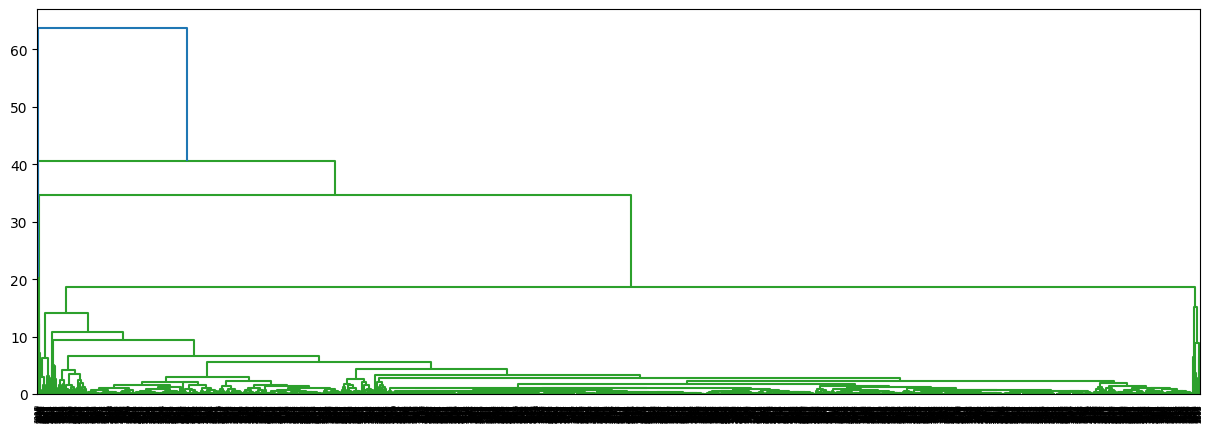

,CustomerID,Recency,Frequency,Monetary,AvgOrderValue,DaysBetweenOrders,Cluster_Id,Hierarchical_Cluster_Id
0,12346.0,325,1,77183.60,77183.600000,325.000000,0,0
1,12347.0,1,182,4310.00,23.681319,0.005495,1,1
2,12348.0,74,31,1797.24,57.975484,2.387097,1,1
3,12349.0,18,73,1757.55,24.076027,0.246575,1,1
4,12350.0,309,17,334.40,19.670588,18.176471,1,1


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Load the data
retail = pd.read_excel('/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx')

# Data Cleaning
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format='%m/%d/%Y %H:%M')
retail['TotalAmount'] = retail['Quantity'] * retail['UnitPrice']
retail_cleaned = retail[retail['TotalAmount'] > 0]

# Feature Engineering
max_date = max(retail_cleaned['InvoiceDate'])
rfm = retail_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Additional Features
rfm['AvgOrderValue'] = rfm['Monetary'] / rfm['Frequency']
rfm['DaysBetweenOrders'] = rfm['Recency'] / rfm['Frequency']

# Rescaling the Attributes
rfm_df = rfm[['Recency', 'Frequency', 'Monetary', 'AvgOrderValue', 'DaysBetweenOrders']]
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)

# Hyperparameter Tuning for K-Means
best_k = 0
best_silhouette = -1

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    silhouette_avg = silhouette_score(rfm_df_scaled, kmeans.labels_)

    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

# Final model with best K
kmeans = KMeans(n_clusters=best_k, max_iter=50)
kmeans.fit(rfm_df_scaled)
rfm['Cluster_Id'] = kmeans.labels_

# Visualization
fig = px.scatter_3d(rfm, x='Recency', y='Frequency', z='Monetary', color='Cluster_Id',
                    size='AvgOrderValue', hover_data=['CustomerID'])
fig.update_layout(scene=dict(xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary'))
fig.show()

# Hierarchical Clustering
mergings = linkage(rfm_df_scaled, method="complete", metric="euclidean")

# Dendrogram
plt.figure(figsize=(15, 5))
dendrogram(mergings)
plt.show()

# Cutting the Dendrogram based on K
cluster_labels = cut_tree(mergings, n_clusters=best_k).reshape(-1, )
rfm['Hierarchical_Cluster_Id'] = cluster_labels

# Visualization
fig = px.scatter_3d(rfm, x='Recency', y='Frequency', z='Monetary', color='Hierarchical_Cluster_Id',
                    size='AvgOrderValue', hover_data=['CustomerID'])
fig.update_layout(scene=dict(xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary'))
fig.show()

# Display the results
rfm.head()
